# Comparing edge-based and region-based segmentation
In this example, we will see how to segment objects from a background. We use the coins image from skimage.data, which shows several coins outlined against a darker background.

In [6]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.exposure import histogram

In [7]:
#obtain the image and plot the histogram
coins = data.coins()
hist, hist_centers = histogram(coins)

Text(0.5, 1.0, 'Histogram of Gray Values')

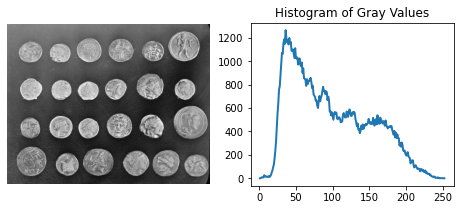

In [9]:
#visualization of histogram
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(coins, cmap=plt.cm.gray)
axes[0].set_axis_off()
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('Histogram of Gray Values')

# Thresholding

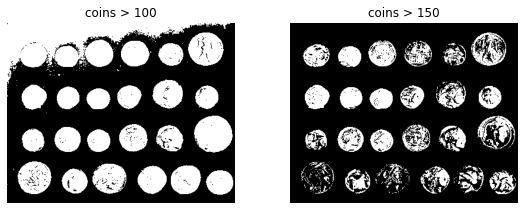

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

axes[0].imshow(coins > 100, cmap=plt.cm.gray)
axes[0].set_title('coins > 100')

axes[1].imshow(coins > 150, cmap=plt.cm.gray)
axes[1].set_title('coins > 150')

for a in axes:
    a.set_axis_off()

fig.tight_layout()

# Edge-based segmentation

In [11]:
#import libraries
from skimage.feature import canny

In [12]:
#detect the edges of coins using canny edge detector
edges = canny(coins)

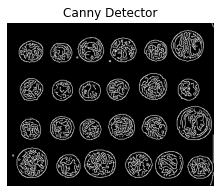

In [14]:
# plot the edges
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(edges, cmap=plt.cm.gray)
ax.set_title('Canny Detector')
ax.set_axis_off()

In [15]:
#import libraries
from scipy import ndimage as ndi     
#This package contains various functions for multidimensional image processing

In [17]:
#fill holes using ndi
fill_coins = ndi.binary_fill_holes(edges)

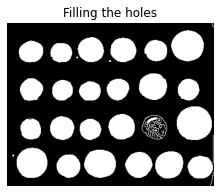

In [19]:
#plotting
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(fill_coins, cmap=plt.cm.gray)
ax.set_title('Filling the holes')
ax.set_axis_off()

In [20]:
#import libraries
from skimage import morphology
# Utilities that operate on shapes in images. 
# These operations are particularly suited for binary images, although some may be useful for images of other types as well. 
# Basic morphological operations include dilation and erosion.

In [21]:
#remove small objects
coins_cleaned = morphology.remove_small_objects(fill_coins, 21)

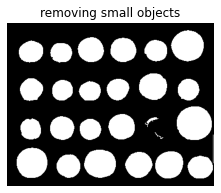

In [22]:
#plotting
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(coins_cleaned, cmap=plt.cm.gray)
ax.set_title('Removing small objects')
ax.set_axis_off()

# Region-based segmentation

In [ ]:
#This technique groups pixels based on their inherent properties such as color,intensity or texture

In [23]:
#import libraries
from skimage.filters import sobel
# It is a gradient-based method that looks for strong changes in the first derivative of an image.

In [24]:
# for computing the amplitude of the gradient
elevation_map = sobel(coins)

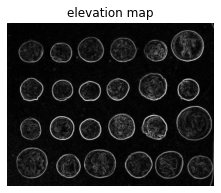

In [25]:
#plotting
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray)
ax.set_title('Elevation Map')
ax.set_axis_off()

In [26]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

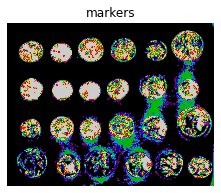

In [27]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral)
ax.set_title('Markers')
ax.set_axis_off()

In [28]:
#import libraries
from skimage import segmentation

In [29]:
segmentation_coins = segmentation.watershed(elevation_map, markers)
#Watershed segmentation is a region-based technique 
#that takes into consideration topographic features such as mountains,valley and basins to segment objects.

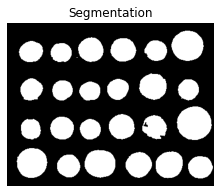

In [30]:
#plotting
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation_coins, cmap=plt.cm.gray)
ax.set_title('Segmentation')
ax.set_axis_off()

In [32]:
#import libraries
from skimage.color import label2rgb
#The label2rgb function determines the color to assign to each object based on the number of objects in the label matrix. The label2rgb function picks colors from the entire range of the colormap. RGB = label2rgb( L , cmap ) specifies the colormap cmap to be used in the RGB image.

In [33]:
#filling holes with colors
segmentation_coins = ndi.binary_fill_holes(segmentation_coins - 1)
labeled_coins, _ = ndi.label(segmentation_coins)
image_label_overlay = label2rgb(labeled_coins, image=coins, bg_label=0)

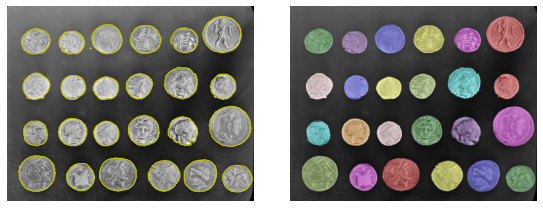

In [34]:
#plotting
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(coins, cmap=plt.cm.gray)
axes[0].contour(segmentation_coins, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay)

for a in axes:
    a.set_axis_off()

fig.tight_layout()

plt.show()